In [86]:
import pandas as pd
import numpy as np
import requests
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates


In [7]:
limit = 1500
dfMovies = pd.read_json(f'http://localhost:8000/movies?limit={limit}')
dfMovies.set_index('id', inplace=True)
dfMovies

,title,year,duration
id,,,
5257,Excuse Me,1915,50.0
6366,Anton the Terrible,1916,50.0
8351,The Mysterious Mrs. Musslewhite,1917,50.0
8384,On the Level,1917,50.0
8642,The Sunset Trail,1917,50.0
...,...,...,...
11885402,Dan Aykroyd and Tom Hanks: City of Crime,1987,NaN
11911992,Bleu de Chanel: The Film,2018,1.0
12771922,Neil Cicierega: Vivid Memories Turn to Fantasi...,2014,3.0


In [25]:
type(dfMovies)

pandas.core.frame.DataFrame

In [10]:
dfStatsMovieByYear = pd.read_json('http://localhost:8000/movies/count_by_year')
dfStatsMovieByYear.columns=['year', 'movie_count']
#dfStatsMovieByYear.set_index('year', inplace=True)
dfStatsMovieByYear

,year,movie_count
0,1915,1
1,1916,1
2,1917,7
3,1918,10
4,1919,10
...,...,...
102,2017,22
103,2018,20
104,2019,28
105,2020,6


In [12]:
# le résultat n'est pas fameux
dfStatsMovieByDirector = pd.read_json('http://localhost:8000/stars/stats_movie_by_director')
dfStatsMovieByDirector

,0,1
0,"{'id': 33, 'name': 'Alfred Hitchcock', 'birthd...",60
1,"{'id': 217, 'name': 'Martin Scorsese', 'birthd...",48
2,"{'id': 229, 'name': 'Steven Spielberg', 'birth...",41
3,"{'id': 142, 'name': 'Clint Eastwood', 'birthda...",39
4,"{'id': 361, 'name': 'Brian De Palma', 'birthda...",38
5,"{'id': 631, 'name': 'Ridley Scott', 'birthdate...",35
6,"{'id': 247, 'name': 'John Woo', 'birthdate': '...",34
7,"{'id': 2588606, 'name': 'Steve McQueen', 'birt...",31
8,"{'id': 600, 'name': 'Sam Raimi', 'birthdate': ...",31
9,"{'id': 406, 'name': 'John Ford', 'birthdate': ...",20


In [22]:
response = requests.get('http://localhost:8000/stars/stats_movie_by_director')
response

<Response [200]>

In [23]:
if response.status_code == 200:
    print('Response OK')
else:
    print('Error', response.status_code, response.json(), sep=', ')

Response OK


In [24]:
data_json = response.json()
data_json

[[{'id': 33, 'name': 'Alfred Hitchcock', 'birthdate': '1899-08-13'}, 60],
 [{'id': 217, 'name': 'Martin Scorsese', 'birthdate': '1942-11-17'}, 48],
 [{'id': 229, 'name': 'Steven Spielberg', 'birthdate': '1946-12-18'}, 41],
 [{'id': 142, 'name': 'Clint Eastwood', 'birthdate': '1930-05-31'}, 39],
 [{'id': 361, 'name': 'Brian De Palma', 'birthdate': '1940-09-11'}, 38],
 [{'id': 631, 'name': 'Ridley Scott', 'birthdate': '1937-11-30'}, 35],
 [{'id': 247, 'name': 'John Woo', 'birthdate': '1946-09-22'}, 34],
 [{'id': 2588606, 'name': 'Steve McQueen', 'birthdate': '1969-10-09'}, 31],
 [{'id': 600, 'name': 'Sam Raimi', 'birthdate': '1959-10-23'}, 31],
 [{'id': 406, 'name': 'John Ford', 'birthdate': None}, 20],
 [{'id': 1392, 'name': 'Peter Jackson', 'birthdate': '1961-10-31'}, 19],
 [{'id': 965, 'name': 'Danny Boyle', 'birthdate': '1956-10-20'}, 18],
 [{'id': 233, 'name': 'Quentin Tarantino', 'birthdate': '1963-03-27'}, 14],
 [{'id': 116, 'name': 'James Cameron', 'birthdate': '1954-08-16'}, 14]

In [27]:
# applatir en liste de tuples
data_flatten = [ (director_dict['id'], director_dict['name'], director_dict['birthdate'], movie_count )  
         for director_dict, movie_count in data_json ]
data_flatten

[(33, 'Alfred Hitchcock', '1899-08-13', 60),
 (217, 'Martin Scorsese', '1942-11-17', 48),
 (229, 'Steven Spielberg', '1946-12-18', 41),
 (142, 'Clint Eastwood', '1930-05-31', 39),
 (361, 'Brian De Palma', '1940-09-11', 38),
 (631, 'Ridley Scott', '1937-11-30', 35),
 (247, 'John Woo', '1946-09-22', 34),
 (2588606, 'Steve McQueen', '1969-10-09', 31),
 (600, 'Sam Raimi', '1959-10-23', 31),
 (406, 'John Ford', None, 20),
 (1392, 'Peter Jackson', '1961-10-31', 19),
 (965, 'Danny Boyle', '1956-10-20', 18),
 (233, 'Quentin Tarantino', '1963-03-27', 14),
 (116, 'James Cameron', '1954-08-16', 14),
 (250445, 'Walter Edwards', None, 14),
 (102908, 'Robert N. Bradbury', None, 13),
 (634240, 'Christopher Nolan', '1970-07-30', 13),
 (94435, 'Bong Joon Ho', '1969-09-14', 12),
 (1053, 'Ethan Coen', '1957-09-21', 12),
 (1054, 'Joel Coen', '1954-11-29', 11)]

In [33]:
# applatir en list de dicts
data_flatten = [ {**director_dict, 'movie_count': movie_count }  
         for director_dict, movie_count in data_json ]
data_flatten

[{'id': 33,
  'name': 'Alfred Hitchcock',
  'birthdate': '1899-08-13',
  'movie_count': 60},
 {'id': 217,
  'name': 'Martin Scorsese',
  'birthdate': '1942-11-17',
  'movie_count': 48},
 {'id': 229,
  'name': 'Steven Spielberg',
  'birthdate': '1946-12-18',
  'movie_count': 41},
 {'id': 142,
  'name': 'Clint Eastwood',
  'birthdate': '1930-05-31',
  'movie_count': 39},
 {'id': 361,
  'name': 'Brian De Palma',
  'birthdate': '1940-09-11',
  'movie_count': 38},
 {'id': 631,
  'name': 'Ridley Scott',
  'birthdate': '1937-11-30',
  'movie_count': 35},
 {'id': 247, 'name': 'John Woo', 'birthdate': '1946-09-22', 'movie_count': 34},
 {'id': 2588606,
  'name': 'Steve McQueen',
  'birthdate': '1969-10-09',
  'movie_count': 31},
 {'id': 600,
  'name': 'Sam Raimi',
  'birthdate': '1959-10-23',
  'movie_count': 31},
 {'id': 406, 'name': 'John Ford', 'birthdate': None, 'movie_count': 20},
 {'id': 1392,
  'name': 'Peter Jackson',
  'birthdate': '1961-10-31',
  'movie_count': 19},
 {'id': 965,
  'nam

In [34]:
dfStatsMovieByDirector = pd.DataFrame(data_flatten)
dfStatsMovieByDirector.set_index('id', inplace=True)
dfStatsMovieByDirector

,name,birthdate,movie_count
id,,,
33,Alfred Hitchcock,1899-08-13,60
217,Martin Scorsese,1942-11-17,48
229,Steven Spielberg,1946-12-18,41
142,Clint Eastwood,1930-05-31,39
361,Brian De Palma,1940-09-11,38
631,Ridley Scott,1937-11-30,35
247,John Woo,1946-09-22,34
2588606,Steve McQueen,1969-10-09,31
600,Sam Raimi,1959-10-23,31


In [37]:
dfStatsMovieByDirector.loc[33].birthdate

'1899-08-13'

In [41]:
datetime.strptime('1899-08-13', '%Y-%m-%d').date()

datetime.date(1899, 8, 13)

In [42]:
date.fromisoformat('1899-08-13')

datetime.date(1899, 8, 13)

In [45]:
dfStatsMovieByDirector[dfStatsMovieByDirector.birthdate.isnull()]

,name,birthdate,movie_count
id,,,
406,John Ford,None,20
250445,Walter Edwards,None,14
102908,Robert N. Bradbury,None,13


In [47]:
dfStatsMovieByDirector[~dfStatsMovieByDirector.birthdate.isnull()].birthdate.apply(date.fromisoformat)

id
33         1899-08-13
217        1942-11-17
229        1946-12-18
142        1930-05-31
361        1940-09-11
631        1937-11-30
247        1946-09-22
2588606    1969-10-09
600        1959-10-23
1392       1961-10-31
965        1956-10-20
233        1963-03-27
116        1954-08-16
634240     1970-07-30
94435      1969-09-14
1053       1957-09-21
1054       1954-11-29
Name: birthdate, dtype: object

In [49]:
# def fromisoformat_or_none(dt):
#    return date.fromisoformat(bd) if bd is not None else None

dfStatsMovieByDirector.birthdate = dfStatsMovieByDirector.birthdate.apply(
    lambda bd: date.fromisoformat(bd) if bd is not None else None)
dfStatsMovieByDirector

,name,birthdate,movie_count
id,,,
33,Alfred Hitchcock,1899-08-13,60
217,Martin Scorsese,1942-11-17,48
229,Steven Spielberg,1946-12-18,41
142,Clint Eastwood,1930-05-31,39
361,Brian De Palma,1940-09-11,38
631,Ridley Scott,1937-11-30,35
247,John Woo,1946-09-22,34
2588606,Steve McQueen,1969-10-09,31
600,Sam Raimi,1959-10-23,31


In [50]:
dfStatsMovieByDirector.loc[33].birthdate

datetime.date(1899, 8, 13)

In [54]:
# other idea: instead of apply read column birthdate as datetime64 (NaT)
limit = 1000
dfStars = pd.read_json(f'http://localhost:8000/stars?limit={limit}', convert_dates=['birthdate'])
dfStars.set_index('id', inplace=True)
dfStars

,name,birthdate
id,,
1,Fred Astaire,1899-01-01
2,Lauren Bacall,1924-01-01
3,Brigitte Bardot,1934-01-01
4,John Belushi,NaT
6,Ingrid Bergman,1915-01-01
...,...,...
1480,Shelley Long,NaT
1484,Jon Lovitz,1957-01-01
1485,Myrna Loy,1905-01-01


## Graphiques avec matplotlib

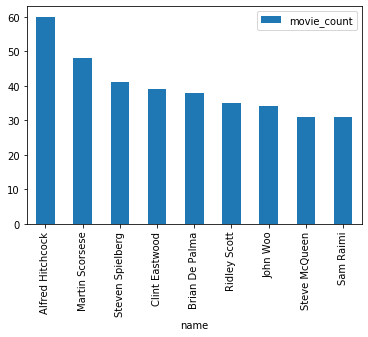

In [78]:
statsToPlot = dfStatsMovieByDirector[dfStatsMovieByDirector.movie_count > 30][['name','movie_count']] \
    .set_index('name')
statsToPlot.plot(kind='bar')

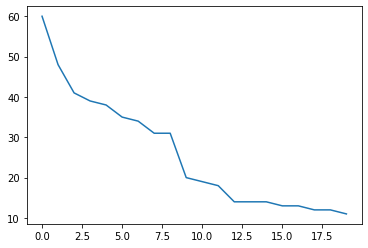

In [67]:
# 1 methode par type de graphe : plot, bar, piechart, ...
movie_count_ndarray = dfStatsMovieByDirector.movie_count.values
plt.plot(movie_count_ndarray)


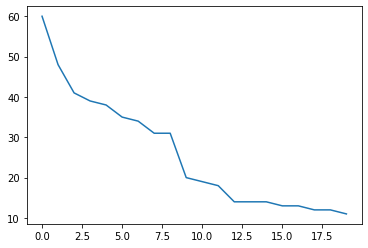

In [70]:
# fig : l'ensemble du dessin
# ax : 1 tracé
fig, ax = plt.subplots()
ax.plot(movie_count_ndarray)

Text(0.5, 1.0, 'diag bar')

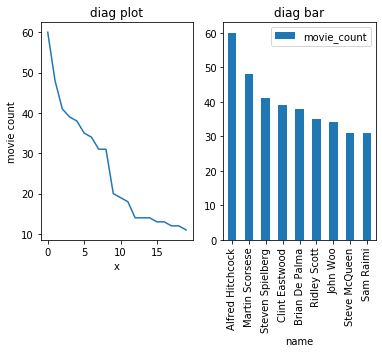

In [84]:
# fig : l'ensemble du dessin
# ax1, ax2 : 2 tracés
fig, (ax1, ax2) = plt.subplots(1,2)
# NB: fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2)

# tracé 1 sur ax1
ax1.plot(movie_count_ndarray)
ax1.set_xlabel('x')
ax1.set_ylabel('movie count')
ax1.set_title('diag plot')
# tracé 2 sur ax2
statsToPlot.plot(kind='bar', ax=ax2)
ax2.set_title('diag bar')


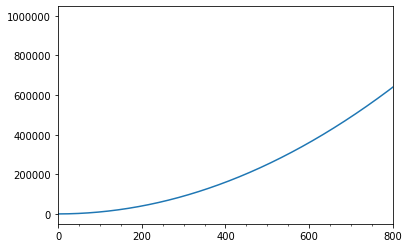

In [93]:
x = np.arange(1000)
y = x**2+1
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xlim(0, 800)
# graduation majeure sur l'axe des x (x axis)
ax.xaxis.set_major_locator(ticker.MultipleLocator(200))
# graduation mineure sur l'axe des x (x axis)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))

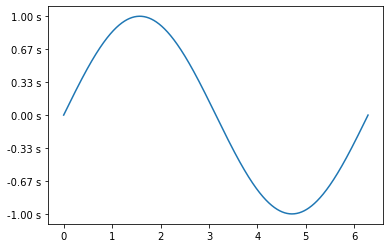

In [99]:
x = np.linspace(0,2*np.pi, 1000)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x,y)
# graduation majeure sur l'axe des y (y axis)
ax.yaxis.set_major_locator(ticker.MultipleLocator(1/3))
# formattage des labels sur la graduation
# https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-formatters.html
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,_: f'{y:.2f} s'))
# graduation mineure sur l'axe des y (y axis)
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))

In [94]:
np.linspace?